# 概述 

最简单的深度⽹络称为多层感知机。多层感知机由多层神经
元组成，每⼀层与它的上⼀层相连，从中接收输⼊；同时每⼀层也与它的下⼀层相连，影响当前层的神经元。
当我们训练容量较⼤的模型时，我们⾯临着过拟合的⻛险。因此，本章将从基本的概念介绍开始讲起，包括
过拟合、⽋拟合和模型选择。为了解决这些问题，本章将介绍权重衰减和暂退法等正则化技术。我们还将讨
论数值稳定性和参数初始化相关的问题，这些问题是成功训练深度⽹络的关键。在本章的最后，我们将把所
介绍的内容应⽤到⼀个真实的案例：房价预测。关于模型计算性能、可伸缩性和效率相关的问题，我们将放
在后⾯的章节中讨论。

# 隐藏层
线性模型可能会出错，线性意味着单调假设：任何特征的增⼤都会导致模型输出的增⼤（如果对应的权重为正），或者导致模型输出的减⼩（如果对应的权重为负）。有时这是有道理的。  

但是，如何对猫和狗的图像进⾏分类呢？增加位置(13, 17)处像素的强度是否总是增加（或降低）图像描绘狗的似然？对线性模型的依赖对应于⼀个隐含的假设，即区分猫和狗的唯⼀要求是评估单个像素的强度。在⼀个倒置图像后依然保留类别的世界⾥，这种⽅法注定会失败。  

与我们前⾯的例⼦相⽐，这⾥的线性很荒谬，⽽且我们难以通过简单的预处理来解决这个问题。这是因为任何像素的重要性都以复杂的⽅式取决于该像素的上下⽂（周围像素的值）。我们的数据可能会有⼀种表⽰，这种表⽰会考虑到我们在特征之间的相关交互作⽤。在此表⽰的基础上建⽴⼀个线性模型可能会是合适的，但我们不知道如何⼿动计算这么⼀种表⽰。对于深度神经⽹络，我们使⽤观测数据来联合学习隐藏层表⽰和应⽤于该表⽰的线性预测器。

### 在网络中加入隐藏层


可以通过在⽹络中加⼊⼀个或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系类型。要做到这⼀点，最简单的⽅法是将许多全连接层堆叠在⼀起。每⼀层都输出到上⾯的层，直到⽣成最后的输出。我们可以把前L−1层看作表⽰，把最后⼀层看作线性预测器。这种架构通常称为多层感知机（multilayer perceptron），通常缩写为MLP。  
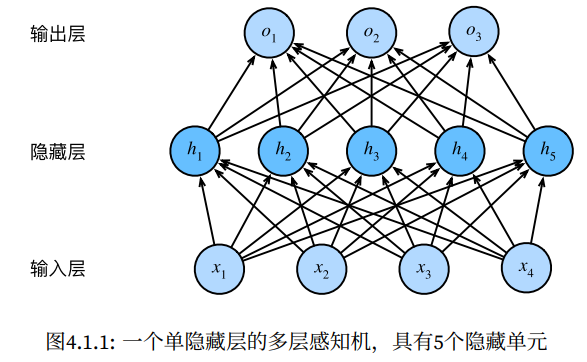  

输⼊层不涉及任何计算，因此使⽤此⽹络产⽣输出只需要实现隐藏层和输出层的计算。因此，这个多层感知机中的层数为2。注意，这两个层都是全连接的。每个输⼊都会影响隐藏层中的每个神经元，⽽隐藏层中的每个神经元⼜会影响输出层中的每个神经元。

### 从线性到非线性
通过矩阵X ∈ Rn×d 来表⽰n个样本的⼩批量，其中每个样本具有d个输⼊特征。    
对于具有h个隐藏单元的单隐藏层多层感知机，⽤H ∈ Rn×h表⽰隐藏层的输出，称为隐藏表⽰（hidden representations）。  
在数学或代码中，H也被称为隐藏层变量（hidden-layer variable）或隐藏变量（hidden variable）。  
因为隐藏层和输出层都是全连接的，所以我们有  
* 隐藏层权重W(1) ∈ Rd×h 
* 隐藏层偏置b(1) ∈ R1×h
* 输出层权重W(2) ∈ Rh×q 
* 输出层偏置b(2) ∈ R1×q

形式上，我们按如下⽅式计算单隐藏层多层感知机的输出 O ∈ Rn×q： 
 
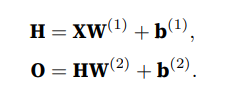

为了发挥多层架构的潜⼒，我们还需要⼀个额外的关键要素：在仿射变换之后对每个隐藏单元应⽤⾮线性的激活函数（activation function）σ。激活函数的输出（例如，σ(·)）被称为活性值（activations）。  
⼀般来说，有了激活函数，就不可能再将我们的多层感知机退化成线性模型：  
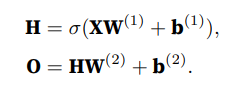  

应⽤于隐藏层的激活函数通常不仅按⾏操作，也按元素操作。这意味着在计算每⼀层的线性部分之后，我们可以计算每个活性值，⽽不需要查看其他隐藏单元所取的值。对于⼤多数激活函数都是这样。
为了构建更通⽤的多层感知机，我们可以继续堆叠这样的隐藏层，  
例如H(1) = σ1(XW(1) + b(1))  
和H(2) =σ2(H(1)W(2) + b(2))，  
⼀层叠⼀层，从⽽产⽣更有表达能⼒的模型。（上一层的输出，作为这一层的输入）


### 通用近似定理
多层感知机可以通过隐藏神经元，捕捉到输⼊之间复杂的相互作⽤，这些神经元依赖于每个输⼊的值。我们可以很容易地设计隐藏节点来执⾏任意计算。例如，在⼀对输⼊上进⾏基本逻辑操作，多层感知机是通⽤近似器。即使是⽹络只有⼀个隐藏层，给定⾜够的神经元和正确的权重，我们可以对任意函数建模，尽管实际中学习该函数是很困难的。神经⽹络有点像C语⾔。C语⾔和任何其他现代编程语⾔⼀样，能够表达任何可计算的程序。但实际上，想出⼀个符合规范的程序才是最困难的部分。⽽且，虽然⼀个单隐层⽹络能学习任何函数，但并不意味着我们应该尝试使⽤单隐藏层⽹络来解决所有问题。事实上，通过使⽤更深（⽽不是更⼴）的⽹络，我们可以更容易地逼近许多函数。

# 激活函数
激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活，它们将输⼊信号转换为输出的可微运算。⼤多数激活函数都是⾮线性的。由于激活函数是深度学习的基础，下⾯简要介绍⼀些常⻅的激活函数。


In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l


### ReLU函数
最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU），因为它实现简单，同时在各种预测任务中表现良好。ReLU提供了⼀种⾮常简单的⾮线性变换。给定元素x，ReLU函数被定义为该元素与0的最⼤值：  
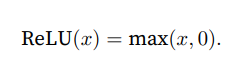  

通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。为了直观感受⼀下，我们可以画出函数的曲线图。正如从图中所看到，激活函数是分段线性的。  


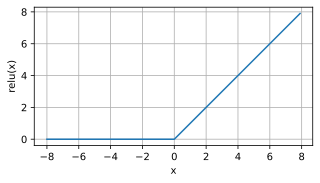

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

当输⼊为负时，ReLU函数的导数为0，⽽当输⼊为正时，ReLU函数的导数为1。注意，当输⼊值精确等于0时，ReLU函数不可导。在此时，我们默认使⽤左侧的导数，即当输⼊为0时导数为0。  
下⾯我们绘制ReLU函数的导数。


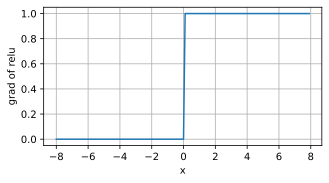

In [4]:
# 绘制ReLU函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

使⽤ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并且ReLU减轻了困扰以往神经⽹络的梯度消失问题。  
注意，ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU）函数 (He et al., 2015)。该变体为ReLU添加了⼀个线性项，因此即使参数是负的，某些信息仍然可以通过：  

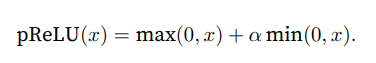



### sigmoid函数
对于⼀个定义域在R中的输⼊，sigmoid函数将输⼊变换为区间(0, 1)上的输出。因此，sigmoid通常称为挤压函数（squashing function）：它将范围（-inf, inf）中的任意输⼊压缩到区间（0, 1）中的某个值：  
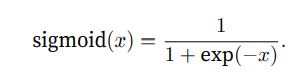  

当⼈们逐渐关注到到基于梯度的学习时，sigmoid函数是⼀个⾃然的选择，因为它是⼀个平滑的、可微的阈值单元近似。当我们想要将输出视作⼆元分类问题的概率时，sigmoid仍然被⼴泛⽤作输出单元上的激活函数（sigmoid可以视为softmax的特例）。然⽽，sigmoid在隐藏层中已经较少使⽤，它在⼤部分时候被更简单、更容易训练的ReLU所取代。在后⾯关于循环神经⽹络的章节中，我们将描述利⽤sigmoid单元来控制时序信息流的架构。


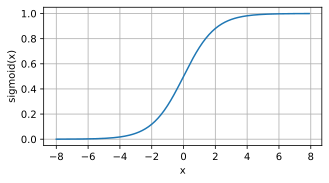

In [5]:
#绘制sigmoid函数。注意，当输⼊接近0时，sigmoid函数接近线性变换
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))


sigmoid函数的导数为下⾯的公式：  
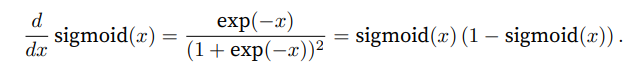  

sigmoid函数的导数图像如下所⽰。注意，当输⼊为0时，sigmoid函数的导数达到最⼤值0.25；⽽输⼊在任⼀⽅向上越远离0点时，导数越接近0。


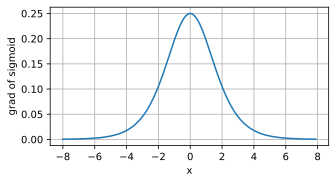

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
#计算sigmoid的导数
y.backward(torch.ones_like(x),retain_graph=True)
#可视化
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### tanh函数
与sigmoid函数类似，tanh(双曲正切)函数也能将其输⼊压缩转换到区间(-1, 1)上。tanh函数的公式如下：  
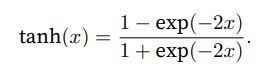  


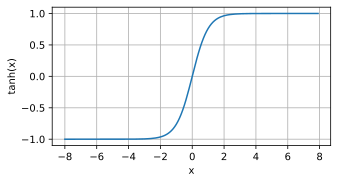

In [8]:
#函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中⼼对称
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：  
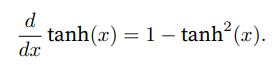  


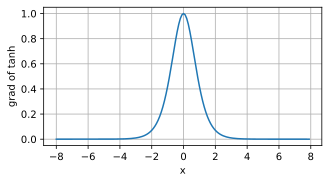

In [9]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 小结
* 多层感知机在输出层和输⼊层之间增加⼀个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。
* 常⽤的激活函数包括ReLU函数、sigmoid函数和tanh函数。
